# Theoretical Effective Area

Generates CSV containing effective areas for individual mirrors for the FOXSI rocket prescription.

Uses outputs from XOP IDL tool for Windt and EPDL97 database.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [27]:
dist = 10400.0 ## source distance (104m) in cm.
# Geometry of the FOXSI mirrors in cm according to info from Brian Ramsey:
# 10-Shell:
Rout   = np.array([ 5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94, 3.725, 3.51, 3.29 ])
Rinter = np.array([ 5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8, 3.59, 3.38, 3.17 ])
Rinner = np.array([ 4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36, 3.18, 2.995, 2.805 ])

## Geometric open area at entrance:
A = np.pi * (Rout**2 - Rinter**2)
# Spider factor
Spider = 0.85
# Correction by the missing of some bounces on the second segment:
d = 60.*np.tan(np.deg2rad(θ))
x = 30.0 * np.tan(np.deg2rad(θ))
## Corrected open area at entrance:
CA = Spider * np.pi * ((Rout-d)**2 - (Rinter-x)**2)

# Difference angle between an at infinity source and one at 104 meters away from the optics pupil.
θ = np.rad2deg(np.arctan((Rout+Rinter)*.5/dist))  ## in degrees
# Incoming Averaged Angle:
α = np.rad2deg(np.arctan((Rout-Rinter)/30.))  ## in degrees
# Incident Angle with correction for finite source:
β = (α+θ) # in degree
# Input angles for XOP:
np.deg2rad(β)*1000. ## in milirad

array([7.00447573, 6.64663654, 6.28975752, 5.93383875, 5.57888029,
       5.39178524, 5.03874816, 4.8516523 , 4.6645562 , 4.31055558])

## Windt 10 A

In [28]:
data_dir = './Windt_R10/'
str_indices = {'R10':''}
file_list, WindtAreas = {}, {}

for key in str_indices:
    file_list.update({key: sorted(glob.glob(data_dir + '*' + key + '*.dat'))})
    
Windtdata = {}
for key in sorted(str_indices):
    aux = {}
    for i,f in enumerate(file_list[key]):
        aux.update({i+1: np.array([np.loadtxt(f).T[0],np.loadtxt(f).T[1]* CA[i]]) })
        Windtdata.update({key: aux })
        
for key in str_indices:
    WindtAreas.update({key:sum([Windtdata[key][j][1] for j in range(1,8)])})

Text(0.5, 1.0, 'Windt Data for 10$\\AA$ Roughness')

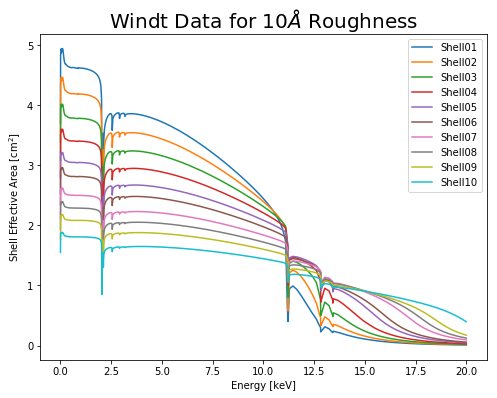

In [37]:
Rlabels = ['Shell01','Shell02','Shell03','Shell04','Shell05','Shell06','Shell07','Shell08','Shell09','Shell10']
plt.figure(figsize=(8,6))
key = 'R10'
for j in range(1,11):
    plt.plot(Windtdata[key][j][0]/1000.,Windtdata[key][j][1],label=Rlabels[j-1])
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title(f'Windt Data for {key[1:]}$\AA$ Roughness',fontsize=20)

In [43]:
key = 'R10'
dictcsv = {'Windt Energy [keV]': Windtdata[key][1][0]/1000.,
           'S1 Windt EA [cm^2]': Windtdata[key][1][1],
           'S2 Windt EA [cm^2]': Windtdata[key][2][1],
           'S3 Windt EA [cm^2]': Windtdata[key][3][1],
           'S4 Windt EA [cm^2]': Windtdata[key][4][1],
           'S5 Windt EA [cm^2]': Windtdata[key][5][1],
           'S6 Windt EA [cm^2]': Windtdata[key][6][1],
           'S7 Windt EA [cm^2]': Windtdata[key][7][1],
           'S8 Windt EA [cm^2]': Windtdata[key][8][1],
           'S9 Windt EA [cm^2]': Windtdata[key][9][1],
           'S10 Windt EA [cm^2]': Windtdata[key][10][1],
          }
pd.DataFrame(dictcsv).to_csv(f"~/Desktop/Windt_R{key}A.csv")

## EPDL97 9A

In [45]:
data_dir = './EPDL97_R09/'
str_indices = {'R09':''}
file_list, EPDL97Areas = {}, {}

for key in str_indices:
    file_list.update({key: sorted(glob.glob(data_dir + '*' + key + '*.dat'))})
    
EPDL97data = {}
for key in sorted(str_indices):
    aux = {}
    for i,f in enumerate(file_list[key]):
        aux.update({i+1: np.array([np.loadtxt(f).T[0],np.loadtxt(f).T[1]* CA[i]]) })
        EPDL97data.update({key: aux })
        
for key in str_indices:
    EPDL97Areas.update({key:sum([EPDL97data[key][j][1] for j in range(1,7)])})

Text(0.5, 1.0, 'EPDL97 Data for 09$\\AA$ Roughness')

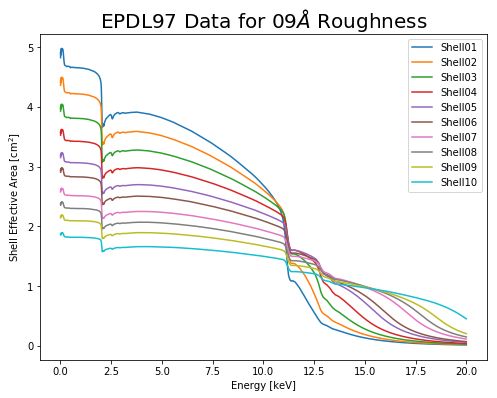

In [47]:
plt.figure(figsize=(8,6))
key = 'R09'
for j in range(1,11):
    plt.plot(EPDL97data[key][j][0]/1000.,EPDL97data[key][j][1],label=Rlabels[j-1])
plt.xlabel('Energy [keV]'); plt.ylabel('Shell Effective Area [cm$^2$]')
plt.legend()
plt.title(f'EPDL97 Data for {key[1:]}$\AA$ Roughness',fontsize=20)

In [48]:
key = 'R09'
dictcsv = {'EPDL97 Energy [keV]': EPDL97data[key][1][0]/1000.,
           'S1 EPDL97 EA [cm^2]': EPDL97data[key][1][1],
           'S2 EPDL97 EA [cm^2]': EPDL97data[key][2][1],
           'S3 EPDL97 EA [cm^2]': EPDL97data[key][3][1],
           'S4 EPDL97 EA [cm^2]': EPDL97data[key][4][1],
           'S5 EPDL97 EA [cm^2]': EPDL97data[key][5][1],
           'S6 EPDL97 EA [cm^2]': EPDL97data[key][6][1],
           'S7 EPDL97 EA [cm^2]': EPDL97data[key][7][1],
           'S8 EPDL97 EA [cm^2]': EPDL97data[key][8][1],
           'S9 EPDL97 EA [cm^2]': EPDL97data[key][9][1],
           'S10 EPDL97 EA [cm^2]': EPDL97data[key][10][1],
          }
pd.DataFrame(dictcsv).to_csv("~/Desktop/EPDL97_R09A.csv")